In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Carga del dataset
boston = pd.read_csv("BostonHousing.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
#Cantidad de valores nulos
print(boston.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [4]:
#Eliminación nulos
boston.dropna(inplace = True)

In [5]:
#Selección de las variables independientes y objetivo
X_multiple = boston.iloc[:, 5:8] # Se seleccionan las columnas 5, 6 y 7
y = boston["MEDV"]

In [6]:
#Separación de los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2)

In [7]:
#Selección del algoritmo a utilizar
modelo = LinearRegression()

In [8]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred_multiple = modelo.predict(X_test)

In [10]:
y_res = pd.DataFrame({"precio_prueba":y_test, "precio_pred":y_pred_multiple})
comparativa = pd.concat([X_test, y_res], axis = 1)
comparativa_ord = comparativa.sort_values(by="precio_prueba")
comparativa_ord.reset_index(drop = True, inplace = True)
comparativa_ord

,RM,AGE,DIS,precio_prueba,precio_pred
0,5.852,77.8,1.5004,6.3,18.546251
1,5.747,98.9,1.6334,8.5,15.272595
2,6.968,91.9,1.4165,10.4,26.674467
3,4.903,97.8,1.3459,11.8,8.255737
4,6.459,94.8,1.9879,11.8,21.685197
...,...,...,...,...,...
74,7.645,49.7,5.2119,46.0,35.238728
75,7.489,90.8,1.9709,50.0,31.013459
76,7.016,97.5,1.2024,50.0,26.583435
77,8.704,86.9,1.8010,50.0,42.002073


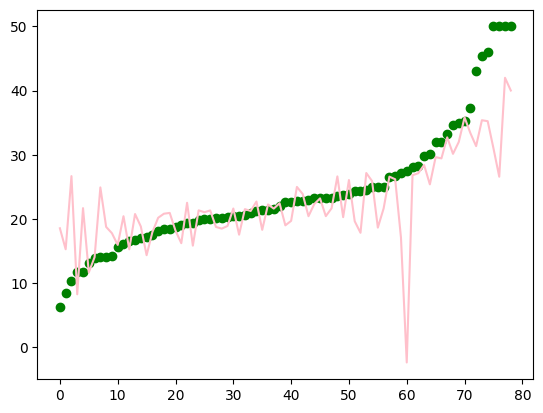

In [11]:
plt.scatter(list(comparativa_ord.index), comparativa_ord.iloc[:,3], color = 'g')
plt.plot(list(comparativa_ord.index), comparativa_ord.iloc[:,4], color = 'pink')

plt.show()

In [12]:
#Valores de la pendiente e intersección
pendiente = modelo.coef_
intercep = modelo.intercept_
print("Pendiente:", pendiente)
print("Intercepción:", intercep)

Pendiente: [ 8.62466578 -0.10910991 -0.49509284]
Intercepción: -22.693704774589477


Devuelve 3 valoes de pendiente, ya que se está usando 3 variables independientes

In [13]:
#Precisión del algoritmo
print(f"Precisión del modelo: {modelo.score(X_train, y_train)}")

Precisión del modelo: 0.6007179985478757
